##DATA PROFILING

In [3]:
#Importing Data
import pandas as pd
#pd.set_option('display.max_columns',None)


In [2]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv('data.csv')

##Showing The Length of The Data

In [5]:
print("\nThe Length of The Data: ", len(df))


The Length of The Data:  11914


##Showing The Shape of The Data

In [57]:
print("\nThe Shape of The Data: ", df.shape)


The Shape of The Data:  (10189, 865)


##Showing The Information of The Data


In [7]:
print("\nThe Information of The Data: ")
print(df.info())


The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int6

##Showing The Statistical Calculations


In [8]:
print("\nThe The Statistical Calculations: ")
print(df.describe().T)



The The Statistical Calculations: 
                    count          mean           std     min      25%  \
Year              11914.0   2010.384338      7.579740  1990.0   2007.0   
Engine HP         11845.0    249.386070    109.191870    55.0    170.0   
Engine Cylinders  11884.0      5.628829      1.780559     0.0      4.0   
Number of Doors   11908.0      3.436093      0.881315     2.0      2.0   
highway MPG       11914.0     26.637485      8.863001    12.0     22.0   
city mpg          11914.0     19.733255      8.987798     7.0     16.0   
Popularity        11914.0   1554.911197   1441.855347     2.0    549.0   
MSRP              11914.0  40594.737032  60109.103604  2000.0  21000.0   

                      50%       75%        max  
Year               2015.0   2016.00     2017.0  
Engine HP           227.0    300.00     1001.0  
Engine Cylinders      6.0      6.00       16.0  
Number of Doors       4.0      4.00        4.0  
highway MPG          26.0     30.00      354.0  
cit

##Showing The Unique Data


In [9]:
print("\nThe The Unique Data: ")
print(df.nunique())


The The Unique Data: 
Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64


##Changing The Column's Name And The Column's Value


In [10]:
kolom_string = list(df.dtypes[df.dtypes == 'object'].index)
for col in kolom_string:
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [11]:
df.rename(columns ={'MSRP': 'Price',
                    'Make': 'Car Brand',
                    'Engine HP': 'HP',
                    'Driven_Wheels':'Driven Mode',
                    'highway MPG':'KML-H',
                    'city mpg':'KML-C'}, inplace=True)

##Looking For A Correlation


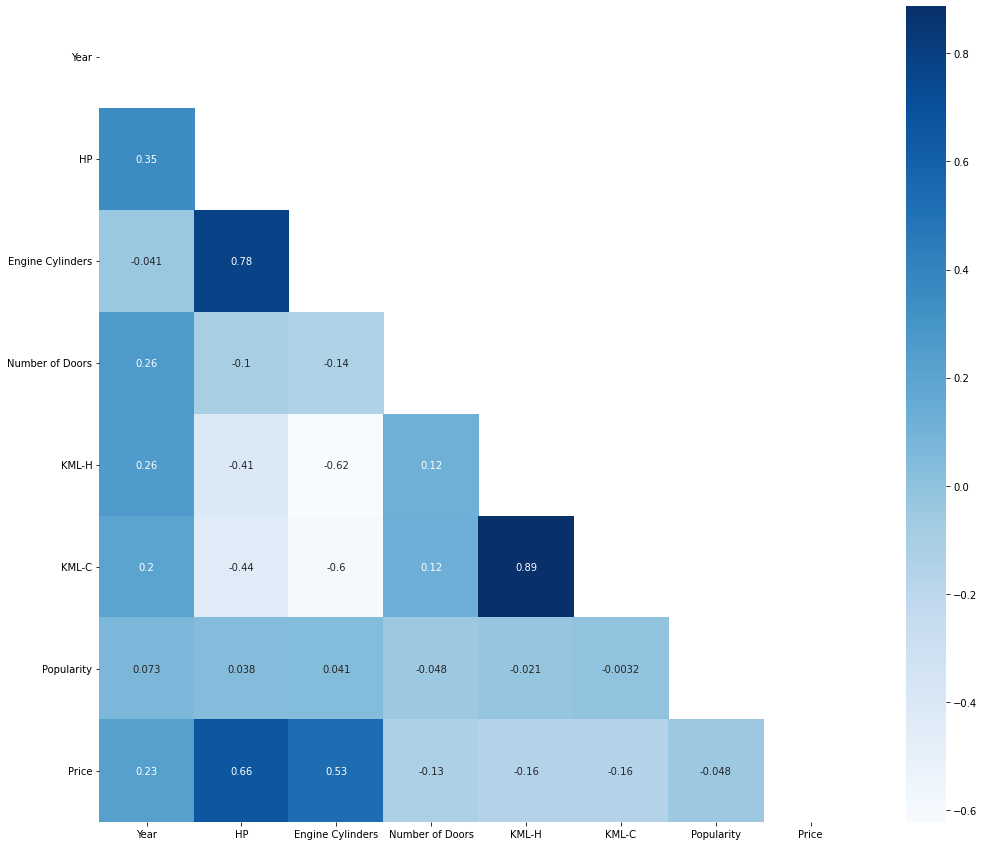

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 15))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.show()

##DATA CLEANSING


In [13]:
#Create a function to remove the outliers
def hapus_outliers(data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR)))]
    return data

In [14]:
#Looking For The Missing Value in Each Column
print("\nLooking For The Missing Value in Each Column: ")
print(df.isnull().sum())


Looking For The Missing Value in Each Column: 
Car Brand               0
Model                   0
Year                    0
Engine Fuel Type        3
HP                     69
Engine Cylinders       30
Transmission Type       0
Driven Mode             0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
KML-H                   0
KML-C                   0
Popularity              0
Price                   0
dtype: int64


##Removing Unnecessary Column


In [15]:
df = df.drop(['Popularity','Number of Doors','KML-H','KML-C','Market Category'], axis=1)


Checking The Price Column


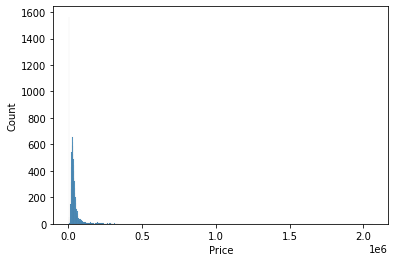


The Amount of Missing Value in Each Column After Removing The Outliers in The Price Column:
Car Brand             0
Model                 0
Year                  0
Engine Fuel Type      3
HP                   56
Engine Cylinders     30
Transmission Type     0
Driven Mode           0
Vehicle Size          0
Vehicle Style         0
Price                 0
dtype: int64

The Shape of The Data After Removing The Outliers:  (10918, 11)


In [16]:
#Checking The Price Column
print("\nChecking The Price Column")
sns.histplot(df['Price'])
plt.show()
df = hapus_outliers(df, 'Price')
print("\nThe Amount of Missing Value in Each Column After Removing The Outliers in The Price Column:")
print(df.isnull().sum())
print("\nThe Shape of The Data After Removing The Outliers: ", df.shape)


Checking The Car Brand Column


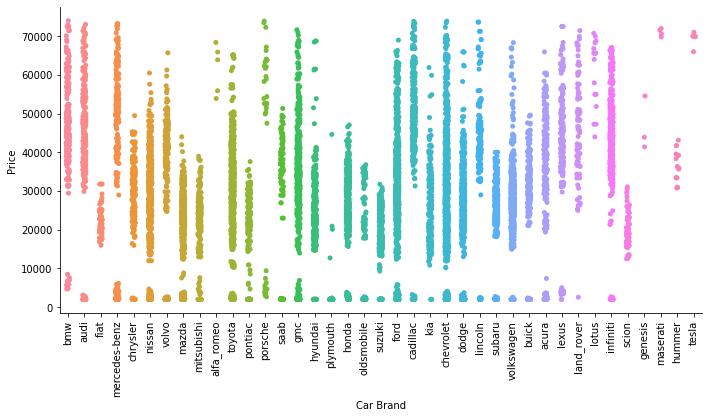

In [17]:
#Checking The Car Brand Column
print("\nChecking The Car Brand Column")
sns.catplot(x='Car Brand', y='Price', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()



Checking The Year Column


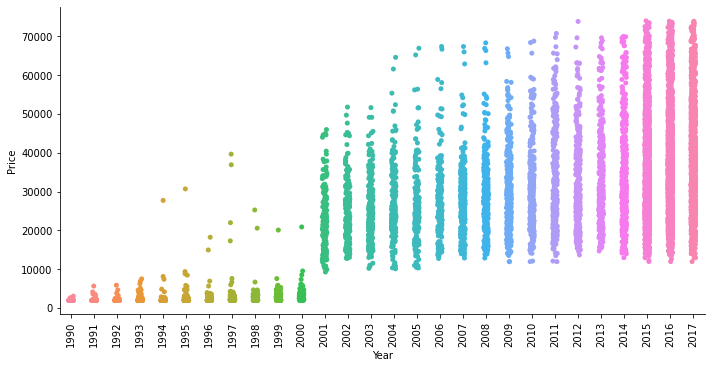

In [18]:
#Checking The Year Column
print("\nChecking The Year Column")
sns.catplot(x='Year', y='Price', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()


Checking The Engine Fuel Type Column


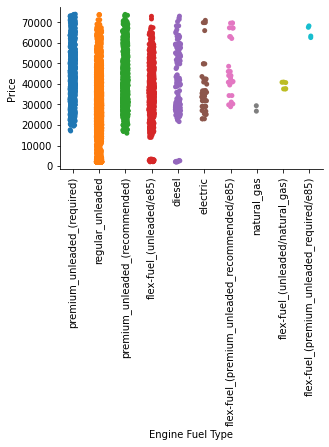

In [19]:
#Checking The Engine Fuel Type Column
print("\nChecking The Engine Fuel Type Column")
sns.catplot(x='Engine Fuel Type', y='Price', data=df, height=3, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [20]:
print("\nThe Data on The Engine Fuel Type Column That Has A Missing Value:")
print(df.loc[(df['Engine Fuel Type'].isnull())])
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna('regular_unleaded')
print("\nThe Amount of Missing Value in Each Column After Handling Missing Value in The Engine Fuel Type Column: ")
print(df.isnull().sum())


The Data on The Engine Fuel Type Column That Has A Missing Value:
      Car Brand   Model  Year Engine Fuel Type     HP  Engine Cylinders  \
11321    suzuki  verona  2004              NaN  155.0               6.0   
11322    suzuki  verona  2004              NaN  155.0               6.0   
11323    suzuki  verona  2004              NaN  155.0               6.0   

      Transmission Type        Driven Mode Vehicle Size Vehicle Style  Price  
11321         automatic  front_wheel_drive      midsize         sedan  17199  
11322         automatic  front_wheel_drive      midsize         sedan  20199  
11323         automatic  front_wheel_drive      midsize         sedan  18499  

The Amount of Missing Value in Each Column After Handling Missing Value in The Engine Fuel Type Column: 
Car Brand             0
Model                 0
Year                  0
Engine Fuel Type      0
HP                   56
Engine Cylinders     30
Transmission Type     0
Driven Mode           0
Vehicle Size      


Checking The Engine Cylinders Column


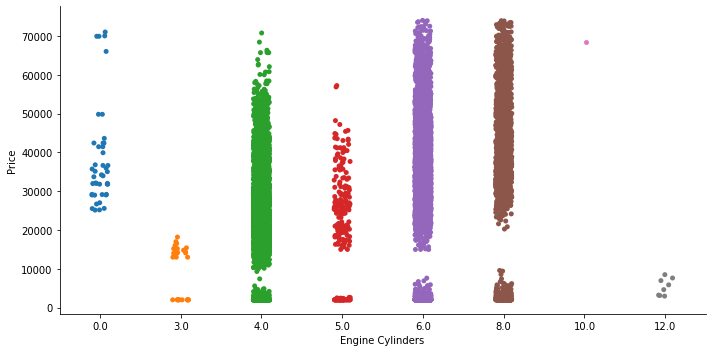

In [21]:
#Checking The Engine Cylinders Column
print("\nChecking The Engine Cylinders Column")
sns.catplot(x='Engine Cylinders', y='Price', data=df, height=5, aspect=2)
plt.show()

In [22]:
print("\nThe Data on The Engine Cylinders Column That Has A Missing Value:")
print(df.loc[(df['Engine Cylinders'].isnull())])
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(0)
print("\nThe Amount of Missing Value in Each Column After Handling Missing Value in The Engine Cylinders Column:")
print(df.isnull().sum())



The Data on The Engine Cylinders Column That Has A Missing Value:
       Car Brand    Model  Year             Engine Fuel Type     HP  \
1983   chevrolet  bolt_ev  2017                     electric  200.0   
1984   chevrolet  bolt_ev  2017                     electric  200.0   
3716  volkswagen   e-golf  2015                     electric  115.0   
3717  volkswagen   e-golf  2015                     electric  115.0   
3718  volkswagen   e-golf  2016                     electric  115.0   
3719  volkswagen   e-golf  2016                     electric  115.0   
5778  mitsubishi   i-miev  2014                     electric    NaN   
5779  mitsubishi   i-miev  2016                     electric   66.0   
5780  mitsubishi   i-miev  2017                     electric   66.0   
8373      toyota  rav4_ev  2012                     electric  154.0   
8695       mazda     rx-7  1993             regular_unleaded  255.0   
8696       mazda     rx-7  1994             regular_unleaded  255.0   
8697      

##Checking the HP Column


In [23]:
print("\nChecking the HP Column")
print("\nThe Data on The HP Column That Has A Missing Value:")
print(df.loc[(df['HP'].isnull())])
df.loc[(df['Car Brand'] == 'fiat') & (df['Model'] == '500e')] = df.loc[(df['Car Brand'] == 'fiat') & (df['Model'] == '500e')].fillna(111)
df.loc[(df['Car Brand'] == 'lincoln') & (df['Model'] == 'continental')] = df.loc[(df['Car Brand'] == 'lincoln') & (df['Model'] == 'continental')].fillna(305)
df.loc[(df['Car Brand'] == 'lincoln') & (df['Model'] == 'mkz')] = df.loc[(df['Car Brand'] == 'lincoln') & (df['Model'] == 'mkz')].fillna(245)
df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'escape')] = df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'escape')].fillna(179)
df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'freestar')] = df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'freestar')].fillna(201)
df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'focus')] = df.loc[(df['Car Brand'] == 'ford') & (df['Model'] == 'focus')].fillna(160)
df.loc[(df['Car Brand'] == 'chevrolet') & (df['Model'] == 'impala')] = df.loc[(df['Car Brand'] == 'chevrolet') & (df['Model'] == 'impala')].fillna(305)
df.loc[(df['Car Brand'] == 'nissan') & (df['Model'] == 'leaf')] = df.loc[(df['Car Brand'] == 'nissan') & (df['Model'] == 'leaf')].fillna(150)
df.loc[(df['Car Brand'] == 'tesla') & (df['Model'] == 'model_s')] = df.loc[(df['Car Brand'] == 'tesla') & (df['Model'] == 'model_s')].fillna(1020)
df.loc[(df['Car Brand'] == 'kia') & (df['Model'] == 'soul_ev')] = df.loc[(df['Car Brand'] == 'kia') & (df['Model'] == 'soul_ev')].fillna(109)
df.loc[(df['Car Brand'] == 'toyota') & (df['Model'] == 'rav4_ev')] = df.loc[(df['Car Brand'] == 'toyota') & (df['Model'] == 'rav4_ev')].fillna(154)
df.loc[(df['Car Brand'] == 'honda') & (df['Model'] == 'fit_ev')] = df.loc[(df['Car Brand'] == 'honda') & (df['Model'] == 'fit_ev')].fillna(123)
df.loc[(df['Car Brand'] == 'mitsubishi') & (df['Model'] == 'i-miev')] = df.loc[(df['Car Brand'] == 'mitsubishi') & (df['Model'] == 'i-miev')].fillna(66)
df.loc[(df['Car Brand'] == 'mercedes-benz') & (df['Model'] == 'm-class')] = df.loc[(df['Car Brand'] == 'mercedes-benz') & (df['Model'] == 'm-class')].fillna(200)
print("\nThe Amount of Missing Value in Each Column After Handling Missing Value in The HP Column:")
print(df.isnull().sum())


Checking the HP Column

The Data on The HP Column That Has A Missing Value:
          Car Brand        Model  Year                  Engine Fuel Type  HP  \
539            fiat         500e  2015                          electric NaN   
540            fiat         500e  2016                          electric NaN   
541            fiat         500e  2017                          electric NaN   
2905        lincoln  continental  2017    premium_unleaded_(recommended) NaN   
2906        lincoln  continental  2017    premium_unleaded_(recommended) NaN   
2907        lincoln  continental  2017    premium_unleaded_(recommended) NaN   
2908        lincoln  continental  2017    premium_unleaded_(recommended) NaN   
4203           ford       escape  2017                  regular_unleaded NaN   
4204           ford       escape  2017                  regular_unleaded NaN   
4205           ford       escape  2017                  regular_unleaded NaN   
4206           ford       escape  2017     

##Removing Duplicated Data


In [24]:
print("\nRemoving Duplicated Data")
df.drop_duplicates(inplace=True)
print('\nThe Shape of The Data After Removing The Duplicated Data: ', df.shape)


Removing Duplicated Data

The Shape of The Data After Removing The Duplicated Data:  (10189, 11)


##Label Encoding on The Dataset


In [25]:
print("\nLabel Encoding on The Dataset")
car_brand = pd.get_dummies(df['Car Brand'], drop_first=True)
model = pd.get_dummies(df['Model'], drop_first=True)
engine_fuel_type = pd.get_dummies(df['Engine Fuel Type'], drop_first=True)
transmission_type = pd.get_dummies(df['Transmission Type'], drop_first=True)
driven_mode = pd.get_dummies(df['Driven Mode'], drop_first=True)
vehicle_size = pd.get_dummies(df['Vehicle Size'], drop_first=True)
vehicle_style = pd.get_dummies(df['Vehicle Style'], drop_first=True)



Label Encoding on The Dataset


In [26]:
df = df.drop(['Car Brand',
              'Model',
              'Engine Fuel Type',
              'Transmission Type',
              'Driven Mode',
              'Vehicle Size',
              'Vehicle Style'], axis=1)

In [27]:
df = pd.concat([car_brand,
                model,
                engine_fuel_type,
                transmission_type,
                driven_mode,
                vehicle_size,
                vehicle_style,
                df], axis=1)

##Separating Features and Labels


In [28]:
X = df.drop('Price', axis=1)
y = df['Price']

##Preparing Training, Testing, And Validating Dataset


In [29]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


##Build a Machine Learning Model LinearRegression


In [30]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg = model_linreg.fit(X_train, y_train)
y_pred_linreg = model_linreg.predict(X_test)


##Evaluating The Machine Learning Model


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


##Mean Squared Error


In [32]:
mse = mean_squared_error(y_test, y_pred_linreg)
print('\nMean squared error dari Testing Set:', round(mse))


Mean squared error dari Testing Set: 128290358883524536172544


##Mean Absolute Error


In [33]:
mae = mean_absolute_error(y_test, y_pred_linreg)
print('Mean absolute error dari Testing Set:', round(mae))

Mean absolute error dari Testing Set: 12073471821


##Root Mean Squared Error


In [34]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse))

Root Mean Squared Error dari Testing Set: 358176435411


##Build a Machine Learning Model DecisionTree

In [35]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr = model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)


##Evaluating The Machine Learning Model


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


##Mean Squared Error


In [37]:
mse = mean_squared_error(y_test, y_pred_dtr)
print('\nMean squared error dari Testing Set:', round(mse))



Mean squared error dari Testing Set: 16094808


##Mean Absolute Error


In [38]:
mae = mean_absolute_error(y_test, y_pred_dtr)
print('Mean absolute error dari Testing Set:', round(mae))


Mean absolute error dari Testing Set: 2667


##Root Mean Squared Error


In [39]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse))

Root Mean Squared Error dari Testing Set: 4012


##Build a Machine Learning Model RandomForest


In [40]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr = model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

##Evaluating The Machine Learning Model


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

##Mean Squared Error


In [42]:
mse = mean_squared_error(y_test, y_pred_rfr)
print('\nMean squared error dari Testing Set:', round(mse))


Mean squared error dari Testing Set: 12398483


##Mean Absolute Error


In [43]:
mae = mean_absolute_error(y_test, y_pred_rfr)
print('Mean absolute error dari Testing Set:', round(mae))

Mean absolute error dari Testing Set: 2380


##Root Mean Squared Error


In [44]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse))

Root Mean Squared Error dari Testing Set: 3521


##Build a Machine Learning Model Lasso


In [45]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(random_state=42)
model_lasso = model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

##Evaluating The Machine Learning Model


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

##Mean Squared Error


In [47]:
mse = mean_squared_error(y_test, y_pred_lasso)
print('\nMean squared error dari Testing Set:', round(mse))



Mean squared error dari Testing Set: 13948854


##Mean Absolute Error


In [48]:
mae = mean_absolute_error(y_test, y_pred_lasso)
print('Mean absolute error dari Testing Set:', round(mae))


Mean absolute error dari Testing Set: 2789


##Root Mean Squared Error


In [49]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse))

Root Mean Squared Error dari Testing Set: 3735


##Build a Machine Learning Model Ridge


In [50]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(random_state=42)
model_ridge = model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)


##Evaluating The Machine Learning Model


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

##Mean Squared Error


In [52]:
mse = mean_squared_error(y_test, y_pred_ridge)
print('\nMean squared error dari Testing Set:', round(mse))


Mean squared error dari Testing Set: 13800444


##Mean Absolute Error


In [53]:
mae = mean_absolute_error(y_test, y_pred_ridge)
print('Mean absolute error dari Testing Set:', round(mae))

Mean absolute error dari Testing Set: 2763


##Root Mean Squared Error


In [54]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse))

Root Mean Squared Error dari Testing Set: 3715


##Visualize The Machine Learning Model


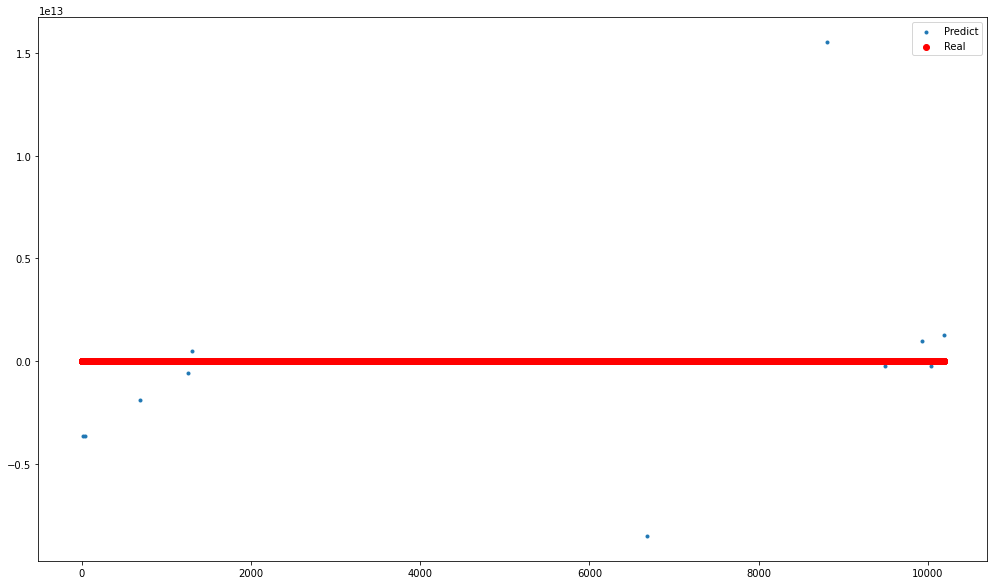

In [55]:
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Price'])
X = df.drop('Price', axis=1)
y = df['Price']
plt.scatter(range(X.shape[0]), model_linreg.predict(X), marker='.', label='Predict')
plt.scatter(range(X.shape[0]), y, color='red', label='Real')
plt.legend(loc='best', prop={'size': 10})
plt.show()

##Validating The Machine Learning Model


In [56]:
for i in range(5):
    real = y_val.iloc[i]
    pred = int(model_linreg.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value      ----->>>>> {real} $\n'
          f'Predicted Value ----->>>>> {pred} $')
    print()

Real Value      ----->>>>> 15535 $
Predicted Value ----->>>>> 14647 $

Real Value      ----->>>>> 24080 $
Predicted Value ----->>>>> 26528 $

Real Value      ----->>>>> 28230 $
Predicted Value ----->>>>> 30781 $

Real Value      ----->>>>> 23390 $
Predicted Value ----->>>>> 26069 $

Real Value      ----->>>>> 20475 $
Predicted Value ----->>>>> 20876 $

